# Project Title: Room Occupancy Prediction Model Using Machine Learning

## Project Description

This project aims to develop a predictive model to accurately determine room occupancy status based on environmental sensor data. The goal is to leverage machine learning techniques to analyze sensor inputs and provide real-time occupancy predictions, enhancing energy efficiency, security, and space utilization in smart buildings.

## Objective
The primary objective of this model is to predict whether a room is occupied based on input features, including temperature, humidity, light, and CO₂ levels. By accurately forecasting occupancy, the model can help optimize heating, ventilation, and air conditioning (HVAC) systems and improve building management systems (BMS).

## Data and Features
The model uses a dataset comprising sensor readings collected over time, with the following key features:

- **Temperature**: Ambient room temperature.
- **Humidity**: Relative humidity in the room.
- **Light**: Light intensity levels, indicating lighting conditions.
- **CO₂ Levels**: Concentration of carbon dioxide as a proxy for human presence.
- **Humidity Ratio**: Derived from temperature and humidity to indicate air moisture levels.

## Target Variable
- **Occupancy Status**: A binary variable indicating whether the room is occupied (`1`) or vacant (`0`).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;"> df Analysis</h1>


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

([<matplotlib.axis.YTick at 0x2cb3de052a0>,
 [Text(0, 0, 'S1_Temp'),
  Text(0, 1, 'S2_Temp'),
  Text(0, 2, 'S3_Temp'),
  Text(0, 3, 'S4_Temp'),
  Text(0, 4, 'S1_Light'),
  Text(0, 5, 'S2_Light'),
  Text(0, 6, 'S3_Light'),
  Text(0, 7, 'S4_Light'),
  Text(0, 8, 'S1_Sound'),
  Text(0, 9, 'S2_Sound'),
  Text(0, 10, 'S3_Sound'),
  Text(0, 11, 'S4_Sound'),
  Text(0, 12, 'S5_CO2'),
  Text(0, 13, 'S5_CO2_Slope'),
  Text(0, 14, 'S6_PIR'),
  Text(0, 15, 'S7_PIR'),
  Text(0, 16, 'Room_Occupancy_Count')])

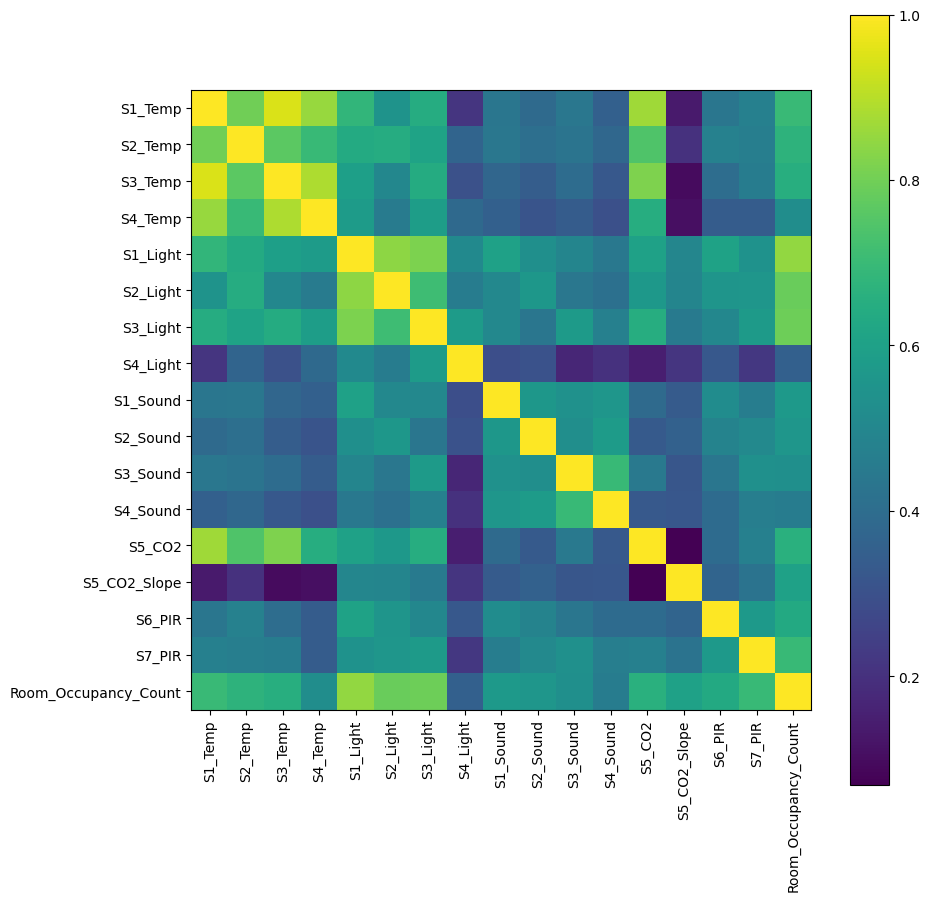

In [2]:
df = pd.read_csv('Occupancy_Estimation.csv')
print(df.info())
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10,10))
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation =90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Preprocessing</h1>


Several data processing steps are conducted before learning:

Data Cleaning<br>
Data Normalization<br>
Feature Selection<br>
Undersampling<br>

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Data Cleaning</h1>

1. Moving the label to the first column

This is aimed at making initialization easier later on.

2. Removing the Date column

Since the dataset does not have recurring dates, using dates to understand patterns would not be representative.

In [3]:
# Remove Date Column
# Taking Output Y variable as the first column
df = df.drop('Date', axis=1)
Output = df.columns[-1]
df = pd.concat([df[Output], df.drop(Output, axis=1)], axis=1)

In [4]:
#                  Time   Hour_sin   Hour_cos
# 0 2024-10-01 00:00:00  0.000000  1.000000
# 1 2024-10-01 06:00:00  0.500000  0.866025
# 2 2024-10-01 12:00:00  1.000000  0.000000
# 3 2024-10-01 18:00:00  0.500000 -0.866025

# Converting to hour, minutes, seconds cycle. Getting 6 new columns and dropping original column
df['Time'] = pd.to_datetime(df['Time'])

df['Hour_sin'] = np.sin(2 * np.pi * df['Time'].dt.hour / 24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Time'].dt.hour / 24)

# Mengkodekan menit sebagai sin dan cos dalam siklus 60 menit
df['Minute_sin'] = np.sin(2 * np.pi * df['Time'].dt.minute / 60)
df['Minute_cos'] = np.cos(2 * np.pi * df['Time'].dt.minute / 60)

# Mengkodekan detik sebagai sin dan cos dalam siklus 60 detik
df['Second_sin'] = np.sin(2 * np.pi * df['Time'].dt.second / 60)
df['Second_cos'] = np.cos(2 * np.pi * df['Time'].dt.second / 60)

# Menghapus kolom waktu asli
df = df.drop('Time', axis=1)

C:\Users\Goku\AppData\Local\Temp\ipykernel_5164\3230100405.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Normalising Data</h1>

In [5]:
from sklearn.preprocessing import StandardScaler

label = df['Room_Occupancy_Count'].reset_index(drop=True)
features = df.drop(columns = 'Room_Occupancy_Count')

scaler = StandardScaler()
normalised_features = scaler.fit_transform(features)

df = pd.concat([label, pd.DataFrame(normalised_features, columns=features.columns)], axis=1)

df.head()

,Room_Occupancy_Count,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,...,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Hour_sin,Hour_cos,Minute_sin,Minute_cos,Second_sin,Second_cos
0,1,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,...,-0.354382,0.664469,-0.314749,-0.294029,0.709121,-1.391221,-1.291112,0.572685,-1.291312,-0.575556
1,1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,...,-0.354382,0.558817,-0.314749,-0.294029,0.709121,-1.391221,-1.223893,0.704548,1.344874,0.436965
2,1,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,...,-0.354382,0.449864,-0.314749,-0.294029,0.709121,-1.391221,-1.223893,0.704548,-1.344345,-0.437319
3,1,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,...,-0.354382,0.337609,-0.314749,-0.294029,0.709121,-1.391221,-1.143251,0.828665,1.383176,0.293939
4,1,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,...,-0.354382,0.222053,-0.314749,-0.294029,0.709121,-1.391221,-1.143251,0.828665,-1.405797,-0.148046


<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Remove Columns(Feature Selection)</h1>

([<matplotlib.axis.YTick at 0x2cb62349360>,
 [Text(0, 0, 'Room_Occupancy_Count'),
  Text(0, 1, 'S1_Temp'),
  Text(0, 2, 'S2_Temp'),
  Text(0, 3, 'S3_Temp'),
  Text(0, 4, 'S4_Temp'),
  Text(0, 5, 'S1_Light'),
  Text(0, 6, 'S2_Light'),
  Text(0, 7, 'S3_Light'),
  Text(0, 8, 'S4_Light'),
  Text(0, 9, 'S1_Sound'),
  Text(0, 10, 'S2_Sound'),
  Text(0, 11, 'S3_Sound'),
  Text(0, 12, 'S4_Sound'),
  Text(0, 13, 'S5_CO2'),
  Text(0, 14, 'S5_CO2_Slope'),
  Text(0, 15, 'S6_PIR'),
  Text(0, 16, 'S7_PIR'),
  Text(0, 17, 'Hour_sin'),
  Text(0, 18, 'Hour_cos'),
  Text(0, 19, 'Minute_sin'),
  Text(0, 20, 'Minute_cos'),
  Text(0, 21, 'Second_sin'),
  Text(0, 22, 'Second_cos')])

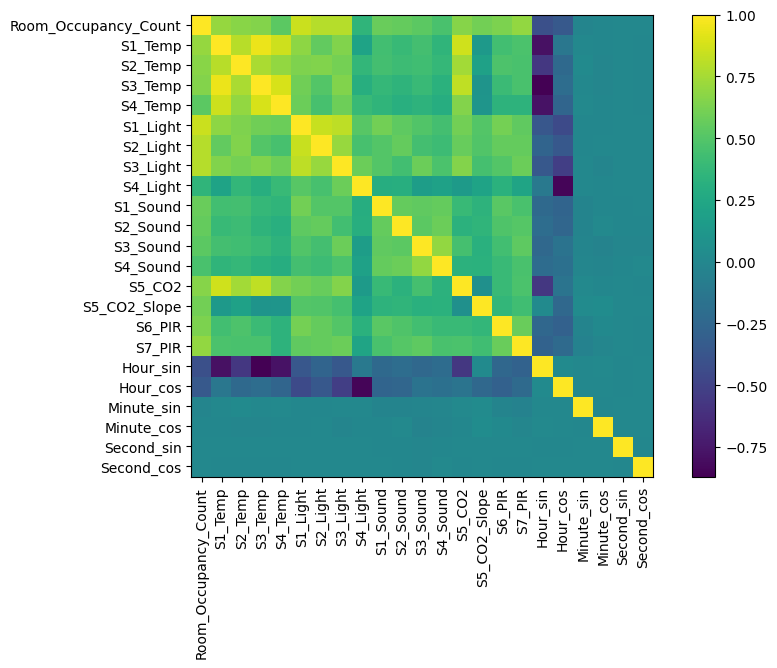

In [6]:
co_mat = df.corr()
plt.figure(figsize=(10,6))
plt.imshow(co_mat)
plt.colorbar()
plt.xticks(range(len(co_mat)), co_mat.columns, rotation=90)
plt.yticks(range(len(co_mat)), co_mat.columns)

In [7]:
#Remove Minute_sin, Minute_cos, Second_sin, Second_cos
df = df.drop(columns=['Minute_sin', 'Minute_cos', 'Second_sin', 'Second_cos'])

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Check Imbalance</h1>

([<matplotlib.patches.Wedge at 0x2cb62aa1420>,
 [Text(-0.9142728929929291, 0.6116412977704664, '0'),
  Text(0.6423335207983827, -0.8929768463172794, '2'),
  Text(0.9653539994005376, -0.5273439635014201, '3'),
  Text(1.088871907244745, -0.1560703995419753, '1')],
 [Text(-0.4986943052688704, 0.33362252605661796, '81.2%'),
  Text(0.3503637386172996, -0.48707827980942503, '7.4%'),
  Text(0.5265567269457477, -0.28764216190986547, '6.9%'),
  Text(0.5939301312244063, -0.08512930884107742, '4.5%')])

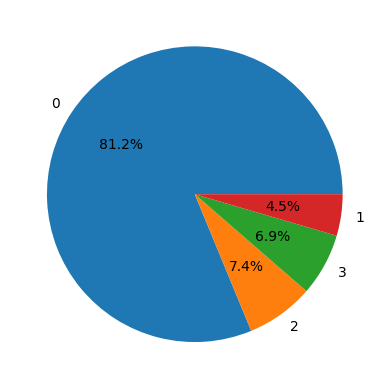

In [8]:
val_cnt = df['Room_Occupancy_Count'].value_counts()
plt.pie(val_cnt, labels = val_cnt.index, autopct='%1.1f%%')

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Undersampling or SMOTE</h1>

In [9]:
Y = 'Room_Occupancy_Count'
min_sample = df[Y].value_counts().min()

new_data = pd.DataFrame()
for val in df[Y].unique():
    subset = df[df[Y]==val]
    new_subset = subset.sample(n = min_sample, replace=False, random_state=42)
    new_data = pd.concat([new_subset, new_data])
print(new_data)

      Room_Occupancy_Count   S1_Temp   S2_Temp   S3_Temp   S4_Temp  S1_Light  \
1881                     0 -0.580680 -0.607302 -0.717642 -0.544657 -0.498837   
8564                     0  0.301673  0.143172  0.452602 -0.179915 -0.498837   
4358                     0 -0.210661 -0.180896 -0.272949 -0.179915 -0.498837   
7832                     0 -0.922236 -0.709639 -1.162334 -1.246084 -0.498837   
379                      0  1.724823  1.422388  1.927109  1.756022 -0.126352   
...                    ...       ...       ...       ...       ...       ...   
508                      1  1.554045  0.450184  1.341987  1.559623  1.834096   
2897                     1  0.301673 -0.402627  0.171744  0.521511  1.912514   
3279                     1  1.212489  2.155805  1.037724  1.559623  1.873305   
3366                     1  1.724823  2.155805  1.178153  1.559623  1.775283   
504                      1  1.383267  0.450184  1.341987  1.559623  1.834096   

      S2_Light  S3_Light  S4_Light  S1_

Text(0.5, 1.0, 'Before Undersampling (IMBALANCED)')

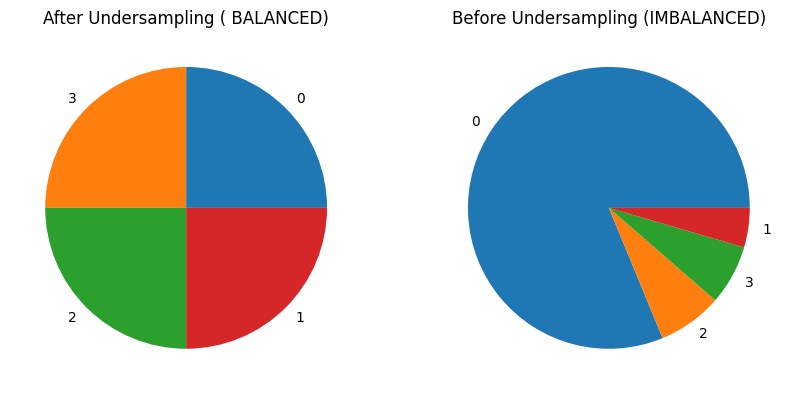

In [10]:
new_pie = new_data[Y].value_counts()
old_pie = df[Y].value_counts()
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.pie(new_pie, labels=new_pie.index)
plt.title('After Undersampling ( BALANCED)')

plt.subplot(1,2,2)
plt.pie(old_pie, labels = old_pie.index)
plt.title('Before Undersampling (IMBALANCED)')

In [11]:
# I now have a new data and df
# residu = data in df - data in new_data
residu = df.merge(new_data, how='left', indicator=True) # It created a _merge coloumn having a column values left_only, both, right_only
residu = residu[residu['_merge']=='left_only']
residu = residu.drop('_merge', axis=1)

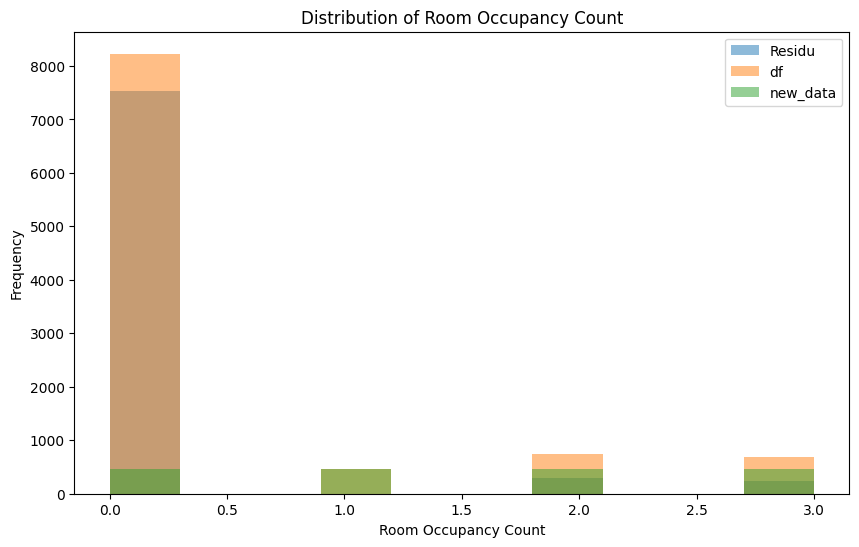

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Histogram for each DataFrame
plt.hist(residu['Room_Occupancy_Count'], bins=10, alpha=0.5, label='Residu')
plt.hist(df['Room_Occupancy_Count'], bins=10, alpha=0.5, label='df')
plt.hist(new_data['Room_Occupancy_Count'], bins=10, alpha=0.5, label='new_data')

# Labeling
plt.xlabel('Room Occupancy Count')
plt.ylabel('Frequency')
plt.title('Distribution of Room Occupancy Count')
plt.legend()

plt.show()


Using various models to predict outcome. Finally we will use residu data to check performance metrices

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Artificial Neural Network</h1>

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [15]:
residu.columns
X = residu.drop(Y,axis=1)
y = residu[Y]
# df = new_data
# X = df.drop(Y, axis=1)  # Y ='Room_Occupancy_Count'
# y = df[Y]

In [16]:
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model=Sequential()
model.add(Dense(120, activation ='relu', input_shape=(X_train.shape[1],)))
# model.add(Dense(120, activation ='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
202/202 [==============================] - 2s 3ms/step - loss: 0.0971 - accuracy: 0.9708 - val_loss: 0.0276 - val_accuracy: 0.9919
Epoch 2/40
202/202 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9922 - val_loss: 0.0186 - val_accuracy: 0.9938
Epoch 3/40
202/202 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9960 - val_loss: 0.0121 - val_accuracy: 0.9950
Epoch 4/40
202/202 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9964 - val_loss: 0.0073 - val_accuracy: 0.9963
Epoch 5/40
202/202 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9974 - val_loss: 0.0065 - val_accuracy: 0.9963
Epoch 6/40
202/202 [==============================] - 0s 2ms/step - loss: 0.0045 - accuracy: 0.9983 - val_loss: 0.0058 - val_accuracy: 0.9969
Epoch 7/40
202/202 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9983 - val_loss: 0.0201 - val_accuracy: 0.9957
Epoch 

In [17]:
from tensorflow.keras.utils import plot_model

# Print the model's layer-wise summary
model.summary()

# Optionally, save the model architecture as an image
plot_model(model, to_file='model_diagram.png', show_shapes=True, show_layer_names=True)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               2280      
                                                                 
 dense_1 (Dense)             (None, 120)               14520     
                                                                 
 dense_2 (Dense)             (None, 120)               14520     
                                                                 
 dense_3 (Dense)             (None, 4)                 484       
                                                                 
Total params: 31,804
Trainable params: 31,804
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


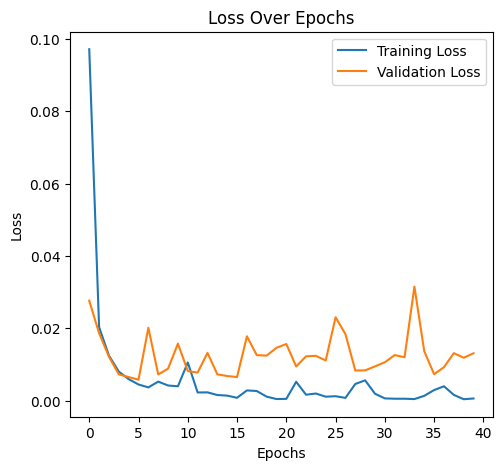

In [18]:
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

51/51 [==============================] - 0s 902us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           2       0.98      0.95      0.96        56
           3       0.93      0.98      0.96        44

    accuracy                           1.00      1612
   macro avg       0.97      0.97      0.97      1612
weighted avg       1.00      1.00      1.00      1612



Text(0.5, 1.0, 'Confusion Matrix')

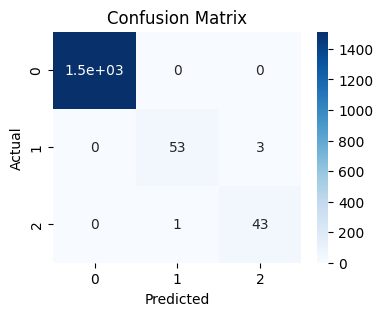

In [19]:
y_pred = model.predict(X_test)

y_pred_lab = np.argmax(y_pred, axis=1)
y_test_lab = np.argmax(y_test, axis=1)

print(classification_report(y_test_lab, y_pred_lab))
cm = confusion_matrix(y_test_lab, y_pred_lab)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Random Forest</h1>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           2       0.98      1.00      0.99        56
           3       1.00      0.98      0.99        44

    accuracy                           1.00      1612
   macro avg       0.99      0.99      0.99      1612
weighted avg       1.00      1.00      1.00      1612



Text(0.5, 1.0, 'Confusion Matrix')

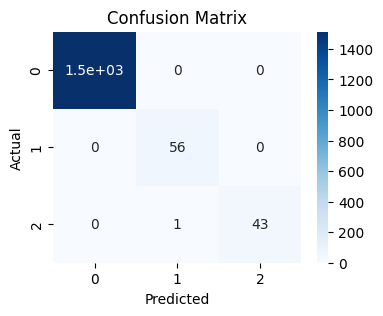

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3, random_state=42)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)
y_pred_lab = np.argmax(y_pred, axis=1)
y_test_lab = np.argmax(y_test, axis=1)

print(classification_report(y_test_lab, y_pred_lab))
cm = confusion_matrix(y_test_lab, y_pred_lab)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">XGBoost</h1>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           2       0.98      0.98      0.98        56
           3       0.98      0.91      0.94        44

    accuracy                           1.00      1612
   macro avg       0.99      0.96      0.97      1612
weighted avg       1.00      1.00      1.00      1612



Text(0.5, 1.0, 'Confusion Matrix')

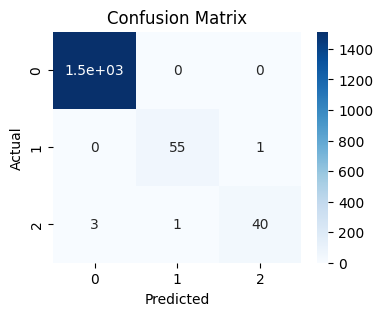

In [21]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

y_pred=model.predict(X_test)

y_pred_lab = np.argmax(y_pred, axis=1)
y_test_lab = np.argmax(y_test, axis=1)

print(classification_report(y_test_lab, y_pred_lab))
cm = confusion_matrix(y_test_lab, y_pred_lab)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


<h1 style="background-color: red; color: white; padding: 10px; text-align: center;">Logistic Regression</h1>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1512
           2       0.98      0.89      0.93        56
           3       0.88      0.95      0.91        44

    accuracy                           1.00      1612
   macro avg       0.95      0.95      0.95      1612
weighted avg       1.00      1.00      1.00      1612



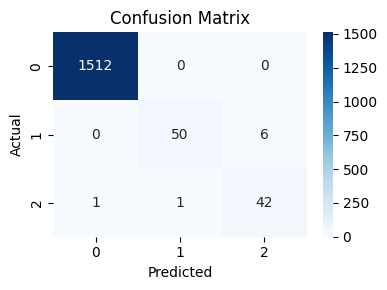

In [191]:
from sklearn.linear_model import LogisticRegression

y_train_lab = np.argmax(y_train, axis=1)

# Train model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train_lab)

y_pred = model.predict(X_test)
y_test_lab = np.argmax(y_test, axis=1)

print(classification_report(y_test_lab, y_pred))

# Create and plot confusion matrix
cm = confusion_matrix(y_test_lab, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()